[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miguelcc705/Proyecto_Inteligencia_Artifical/blob/main/PROYECTO_ENTREGA2.ipynb)



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miguelcc007","key":"5bb3315cb43c4db430d791e9bc430112"}'}

In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
! kaggle datasets download -d vbookshelf/respiratory-sound-database

100% 3.67G/3.69G [00:26<00:00, 154MB/s]
100% 3.69G/3.69G [00:26<00:00, 147MB/s]


In [ ]:
! unzip /content/respiratory-sound-database.zip

Archive:  /content/respiratory-sound-database.zip
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.wav  
  inflating: Respirato

In [ ]:
import librosa
import pywt
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import scipy.signal as signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
demografia=list();

In [ ]:
#Extraccion de la informacion de demografica de los pacientes del estudio segun archivo txt
with open('/content/demographic_info.txt') as file:
    for line in file:
        demografia.append(line.rstrip())

In [ ]:
demografia.remove('223 NA NA NA NA NA');

In [ ]:
print(demografia)

['', '101 3 F NA 19 99', '102 0.75 F NA 9.8 73', '103 70 F 33 NA NA', '104 70 F 28.47 NA NA', '105 7 F NA 32 135', '106 73 F 21 NA NA', '107 75 F 33.7 NA NA', '108 3 M NA NA NA', '109 84 F 33.53 NA NA', '110 75 M 25.21 NA NA', '111 63 M 28.4 NA NA', '112 60 M 22.86 NA NA', '113 58 M 28.41 NA NA', '114 77 M 23.12 NA NA', '115 0.58 M NA 7.14 64', '116 56 M 28.58 NA NA', '117 68 M 24.4 NA NA', '118 81 M 36.76 NA NA', '119 2 F NA 15.2 94', '120 78 M 35.14 NA NA', '121 13 F NA 65 170', '122 66 M 33 NA NA', '123 5 M NA 25 125', '124 65 M 29.07 NA NA', '125 14 M NA 62 170', '126 1 F NA 10.18 80', '127 2 M NA 12.6 98', '128 65 F 24.3 NA NA', '129 6 M NA 23 119', '130 85 F 17.1 NA NA', '131 3 M NA 14 97', '132 71 M 34 NA NA', '133 68 M 27.4 NA NA', '134 61 M 32 NA NA', '135 70 M 21 NA NA', '136 5 M NA 16.2 110', '137 4 M NA 18 104', '138 56 F 21.6 NA NA', '139 61 M 28.68 NA NA', '140 79 F 23 NA NA', '141 66 M 22.4 NA NA', '142 78 M 26.1 NA NA', '143 0.25 F NA 8.24 68', '144 3 M NA 16.7 100', '1

In [ ]:
##Archivos de audio y texto con los datos descargados desde Kaggle
import os
respiratorysounds = os.listdir('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files')
print('Cantidad de archivos',len(respiratorysounds))
print('Nombres de los archivos:',respiratorysounds)

Cantidad de archivos 1840
Nombres de los archivos: ['146_8p3_Pl_mc_AKGC417L.txt', '146_8p3_Pr_mc_AKGC417L.wav', '170_1b2_Al_mc_AKGC417L.txt', '160_1b2_Lr_mc_AKGC417L.wav', '117_1b3_Tc_mc_LittC2SE.wav', '130_2p5_Pl_mc_AKGC417L.wav', '197_1b1_Tc_sc_Meditron.txt', '160_1b4_Al_mc_AKGC417L.txt', '107_2b3_Al_mc_AKGC417L.txt', '219_2b2_Tc_mc_LittC2SE.txt', '144_1b1_Tc_sc_Meditron.txt', '160_1b3_Pr_mc_AKGC417L.wav', '163_8b3_Ll_mc_AKGC417L.wav', '199_2b1_Ll_mc_LittC2SE.wav', '176_1b4_Ar_mc_AKGC417L.txt', '146_2b4_Al_mc_AKGC417L.wav', '218_1b1_Pl_sc_Meditron.wav', '177_1b4_Al_mc_AKGC417L.wav', '203_1p3_Pr_mc_AKGC417L.txt', '107_2b3_Ll_mc_AKGC417L.txt', '132_2b2_Lr_mc_LittC2SE.wav', '213_1p2_Lr_mc_AKGC417L.wav', '197_1b1_Tc_sc_Meditron.wav', '185_1b1_Ll_sc_Litt3200.txt', '207_2b3_Tc_mc_AKGC417L.txt', '204_7p5_Ar_mc_AKGC417L.wav', '130_1p3_Pl_mc_AKGC417L.wav', '186_2b2_Pr_mc_AKGC417L.txt', '199_2b1_Ll_mc_LittC2SE.txt', '200_2p4_Lr_mc_AKGC417L.txt', '147_2b3_Al_mc_AKGC417L.wav', '112_1b1_Lr_sc_Med

In [ ]:
#Almacenamiento de la informacion 
#Audiostxt y audioswav se usan para hacer el split
audiostxt=list();
audioswav=list();
#Archivos_audio y Archivos_texto almacenan la ruta del archivo.wav y la ruta del archivo.txt respectivamente
archivos_audio=list()
archivos_texto=list()
for i in range(0,len(respiratorysounds)):
  if respiratorysounds[i].split('.')[1] == ('txt'): #Si el archivo es de texto lo almacena en archivos_texto
    audiostxt.append(respiratorysounds[i].split('.'));
    archivos_texto.append(respiratorysounds[i]);
  elif respiratorysounds[i].split('.')[1] == ('wav'):#Si el archivo es de audio lo almacena en archivos_texto
    audioswav.append(respiratorysounds[i].split('.'));
    archivos_audio.append(respiratorysounds[i]);

In [ ]:
print(len(archivos_texto));
print(len(archivos_audio));

920
920


In [ ]:
archivos_texto_new=list()
archivos_audio_new=list()
for i in range(0,len(archivos_texto)):

  rut=archivos_texto[i].split('_');
  if (int(rut[0])!=223):
    archivos_texto_new.append(archivos_texto[i])

for i in range(0,len(archivos_audio)):
  rut=archivos_audio[i].split('_');
  if (int(rut[0])!=223):
    archivos_audio_new.append(archivos_audio[i])

In [ ]:
print(len(archivos_texto_new));
print(len(archivos_audio_new));

914
914


#Fuenciones para el procesameinto de una señal.

In [ ]:
def wnoisest(coeff): #Ponderacion
    stdc = np.zeros((len(coeff),1));

    for i in range(0,len(coeff)):
        stdc[i] = (np.median(np.absolute(coeff[i])))/0.6745;
    return stdc;

def threshold(coeff): #Umbral
    Num_samples = 0;
    for i in range(0,len(coeff)):
        Num_samples = Num_samples + coeff[i].shape[0];
    
    thr = np.sqrt(2*(np.log(Num_samples)))
    return thr

def wthresh(coeff): # denoising
    y   = list();
    s = wnoisest(coeff);
    thr = threshold(coeff)
    for i in range(0,len(coeff)):
        y.append(np.multiply(coeff[i],np.abs(coeff[i])>(thr*s[i])));
    return thr,s,y;

In [ ]:
#-------------------------------------------------------------------------------------------------
#FILTRADO EN AMPLITUD
def wavelet_denoising(audio): #Eliminacion del ruido
  LL = int(np.floor(np.log2(audio.shape[0]))); #Nivel de descomposicion

  data_wavelet = pywt.wavedec(audio, 'db6', level=LL );#Coeficientes de aproximacion y detalle
  details = data_wavelet[1:]; #Coeficientes de detalle
  thr, s, details_t = wthresh(details); #Umbralizacion
  coeff = list();
  coeff.append(data_wavelet[0]);#Coeficiente de aproximacion

  for i in range(len(details_t)):#Adicion de cada uno de los coeficientes de detalle
    coeff.append(details_t[i]) 
  x_rec = pywt.waverec( coeff, 'db6');#Reconstruccion de la señal con los detalle de ruido
  x_rec = x_rec[0:audio.shape[0]]; 
  x_filt = np.squeeze(audio - x_rec);#Eliminacion del ruido en la señal
  return x_filt #Retorno de la señal filtrada en amplitud
#--------------------------------------------------------------------------------------------------
#FILTRADO EN FRECUENCIA. 1000 100
def filtrado(audio,sr):
  fs = sr;
  orden=31;
  Fc_h=1000
  Fc_l=100
  wn_pb=2*Fc_h/fs;
  wn_pa=2*Fc_l/fs;
  #design
  lowpass=signal.firwin(orden,wn_pb,pass_zero='lowpass'); #Pasa bajas entre 0-1000
  highpass=signal.firwin(orden,wn_pa,pass_zero='highpass');#Pasa altas 0-100

  y_hp = signal.filtfilt(highpass, 1, audio); #Filtro pasaaltas
  y_bp = signal.filtfilt(lowpass, 1, y_hp);   #Filtro pasabandas
  y_bp = np.asfortranarray(y_bp)         
  return y_bp

#---------------------------------------------------------------------------------------------------
def preprocesamiento(senal,sr):
  y_bp=filtrado(senal,sr);
  senal_prepros=wavelet_denoising(y_bp);
  return senal_prepros  #Retorna la señal filtrada

#---------------------------------------------------------------------------------------------------
#DENSIDAD ESPECTRAL DE POTENCIA.

def dep_ciclo(ciclorespiratorio):
  nperseg = 2000; #Tamaño de la ventana del metodo de welch
  noverlap = int(nperseg/2); #Solapamiento de la ventana,correspondiente al 50%   
  fs=22050;
  f, Pxx = signal.welch(ciclorespiratorio, fs, 'hamming', nperseg, noverlap,scaling='density');
  DEP=(Pxx[(f>=80) & (f<=250)]); #Se añaden a lista de la densidad espectral de potencia
  ft=(f[(f>=80) & (f<=250)]); #Se añade la frecuencia al vector de frecuencias
  IndiceDEP=np.sum(DEP) #Indice para analisis de la DEP como area en el rango de las frecuencias de interes

  return IndiceDEP

#FUENCIÓN PARA EXTRAER Y FILTRAR CICLOS.

In [ ]:
#Ingresado un archivo de texto extrae los ciclos y sus caracteristicas 
#Si filtro==True filtra la señal mediante la funcion anterior
def extraccionciclos(ruta_texto,demografia):
  ruta=ruta_texto.split('.')[0];
  ruta_audio=ruta+('.wav');

  num_paciente=ruta_texto.split('/')[5].split('_')[0];
  pos_estetoscopio=ruta_texto.split('/')[5].split('_')[2];
  anotacionestxt=list();
  anotacioneswav=list();
  extraccion=list();
  fs=22050;
  
  for i in range(0,len(demografia)):
    num_paciente2=demografia[i].split(' ')[0];
    if (num_paciente)==(num_paciente2):
      edad=demografia[i].split(' ')[1];
      sexo=demografia[i].split(' ')[2];

  with open(ruta_texto) as file:
    for line in file:
        anotacionestxt.append(line.rstrip());
  audio=(librosa.load(ruta_audio))[0];
  audio=preprocesamiento(audio,fs);

  nciclos=len(anotacionestxt);
  for i in range(0,nciclos):
    ciclos=list();
    c=anotacionestxt[i].split('\t');    
    ciclos.append(edad); #edad
    ciclos.append(sexo); #sexo
    ciclos.append(pos_estetoscopio);
    if (int(c[2]==1)) or (int(c[3])==1):
      ciclos.append(1); #enfermo
    else: ciclos.append(0); #sano
    ciclos.append(dep_ciclo(audio[int(float(c[0])*fs):int(float(c[1])*fs)]));#Audio del ciclo
    extraccion.append(ciclos);
  #Retorna una lista donde cada elemento corresponde a la informacion de un ciclo 
  #almacenado en una   lista que contiene:
  #EDAD,SEXO,POSICIÓN,ENFERMO(1)/SANO(0),CICLO
  return np.asarray(extraccion) 

In [ ]:
au="/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt"
j=au.split("/")
print(j[5])

101_1b1_Pr_sc_Meditron.txt


In [ ]:
inf_dataset=np.array([[np.nan,np.nan,np.nan,np.nan,np.nan]])
for i in range(0,len(archivos_texto_new)):
  new_information=extraccionciclos("/content/drive/MyDrive/Dataset_IA_project/archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"+archivos_texto_new[i],demografia);
  inf_dataset=np.concatenate((inf_dataset,new_information),axis=0);

In [ ]:
##Concatenacion con datos desde Kaggle
inf_dataset=np.array([[np.nan,np.nan,np.nan,np.nan,np.nan]])
for i in range(0,len(archivos_texto_new)):
  new_information=extraccionciclos("/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/"+archivos_texto_new[i],demografia);
  inf_dataset=np.concatenate((inf_dataset,new_information),axis=0);

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 18 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 19 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 17 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 20 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [ ]:
edades=inf_dataset[:,0];
sexos=inf_dataset[:,1];
posiciones=inf_dataset[:,2];
diagnostico=inf_dataset[:,3];
audiociclo=inf_dataset[:,4];

In [ ]:
DF=pd.DataFrame(columns=['EDAD', 'SEXO', 'POS','DIAGNOSTICO','AUDIO']);
DF.EDAD=edades;
DF.SEXO=sexos;
DF.POS=posiciones;
DF.DIAGNOSTICO=diagnostico;
DF.AUDIO=audiociclo;

In [ ]:
print(DF)

     EDAD SEXO  POS DIAGNOSTICO                   AUDIO
0     nan  nan  nan         nan                     nan
1      67    M   Pl           0  2.6621996845836067e-08
2      67    M   Pl           0   5.989764528129785e-08
3      67    M   Pl           0    5.37989117394039e-08
4      67    M   Pl           0   5.454190072909437e-08
...   ...  ...  ...         ...                     ...
6833   58    M   Al           0   6.061210985007345e-06
6834   58    M   Al           0   5.665367053361362e-06
6835   72    F   Al           0  5.0235575378866564e-05
6836   72    F   Al           0   4.829487835448277e-05
6837   72    F   Al           0   4.072506216346124e-05

[6838 rows x 5 columns]


In [ ]:
DFCOPY=DF.copy();

DFCOPY.insert(2,"Pos_Tc",np.nan, allow_duplicates=False); #Creamos una columna para cada posición independiente
DFCOPY.insert(3,"Pos_Al",np.nan, allow_duplicates=False);
DFCOPY.insert(4,"Pos_Ar",np.nan, allow_duplicates=False);
DFCOPY.insert(5,"Pos_Pl",np.nan, allow_duplicates=False);
DFCOPY.insert(6,"Pos_Pr",np.nan, allow_duplicates=False);
DFCOPY.insert(7,"Pos_Ll",np.nan, allow_duplicates=False);
DFCOPY.insert(8,"Pos_Lr",np.nan, allow_duplicates=False);

DFCOPY.Pos_Tc[DFCOPY.POS=="Tc"]=1; DFCOPY.Pos_Tc=DFCOPY.Pos_Tc.fillna(0); DFCOPY.Pos_Tc=DFCOPY.Pos_Tc.astype(int); #Cada valor indica si el ciclo fue tomado en dicha posición (1) o no (0)
DFCOPY.Pos_Al[DFCOPY.POS=="Al"]=1; DFCOPY.Pos_Al=DFCOPY.Pos_Al.fillna(0); DFCOPY.Pos_Al=DFCOPY.Pos_Al.astype(int);
DFCOPY.Pos_Ar[DFCOPY.POS=="Ar"]=1; DFCOPY.Pos_Ar=DFCOPY.Pos_Ar.fillna(0); DFCOPY.Pos_Ar=DFCOPY.Pos_Ar.astype(int);
DFCOPY.Pos_Pl[DFCOPY.POS=="Pl"]=1; DFCOPY.Pos_Pl=DFCOPY.Pos_Pl.fillna(0); DFCOPY.Pos_Pl=DFCOPY.Pos_Pl.astype(int);
DFCOPY.Pos_Pr[DFCOPY.POS=="Pr"]=1; DFCOPY.Pos_Pr=DFCOPY.Pos_Pr.fillna(0); DFCOPY.Pos_Pr=DFCOPY.Pos_Pr.astype(int);
DFCOPY.Pos_Ll[DFCOPY.POS=="Ll"]=1; DFCOPY.Pos_Ll=DFCOPY.Pos_Ll.fillna(0); DFCOPY.Pos_Ll=DFCOPY.Pos_Ll.astype(int);
DFCOPY.Pos_Lr[DFCOPY.POS=="Lr"]=1; DFCOPY.Pos_Lr=DFCOPY.Pos_Lr.fillna(0); DFCOPY.Pos_Lr=DFCOPY.Pos_Lr.astype(int);

DFCOPY=DFCOPY.drop('POS', axis=1);
DFCOPY=DFCOPY.drop(DFCOPY.index[0]);

DFCOPY.SEXO[DFCOPY.SEXO=="M"]=1;DFCOPY.SEXO[DFCOPY.SEXO=="F"]=0;DFCOPY.SEXO=DFCOPY.SEXO.astype(int); #cambiamos la forma de sexo a M=1 y F=0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

In [ ]:
print(DFCOPY)

     EDAD  SEXO  Pos_Tc  Pos_Al  Pos_Ar  Pos_Pl  Pos_Pr  Pos_Ll  Pos_Lr  \
1      67     1       0       0       0       1       0       0       0   
2      67     1       0       0       0       1       0       0       0   
3      67     1       0       0       0       1       0       0       0   
4      67     1       0       0       0       1       0       0       0   
5      67     1       0       0       0       1       0       0       0   
...   ...   ...     ...     ...     ...     ...     ...     ...     ...   
6833   58     1       0       1       0       0       0       0       0   
6834   58     1       0       1       0       0       0       0       0   
6835   72     0       0       1       0       0       0       0       0   
6836   72     0       0       1       0       0       0       0       0   
6837   72     0       0       1       0       0       0       0       0   

     DIAGNOSTICO                   AUDIO  
1              0  2.6621996845836067e-08  
2            

In [ ]:
DFCOPY.to_csv('Dataframe_datos.csv', header=True, index=True)

In [ ]:
DFCOPY=pd.read_csv("Dataframe_datos_Graficas.csv");
print(DFCOPY)

      Unnamed: 0  EDAD  SEXO  Pos_Tc  Pos_Al  Pos_Ar  Pos_Pl  Pos_Pr  Pos_Ll  \
0              1  67.0     1       0       0       0       1       0       0   
1              2  67.0     1       0       0       0       1       0       0   
2              3  67.0     1       0       0       0       1       0       0   
3              4  67.0     1       0       0       0       1       0       0   
4              5  67.0     1       0       0       0       1       0       0   
...          ...   ...   ...     ...     ...     ...     ...     ...     ...   
6832        6833  58.0     1       0       1       0       0       0       0   
6833        6834  58.0     1       0       1       0       0       0       0   
6834        6835  72.0     0       0       1       0       0       0       0   
6835        6836  72.0     0       0       1       0       0       0       0   
6836        6837  72.0     0       0       1       0       0       0       0   

      Pos_Lr  DIAGNOSTICO         AUDIO

In [ ]:
Data_Tc=DFCOPY[(DFCOPY["Pos_Tc"]==1)]
Data_Al=DFCOPY[(DFCOPY["Pos_Al"]==1)]
Data_Ar=DFCOPY[(DFCOPY["Pos_Ar"]==1)]
Data_Pl=DFCOPY[(DFCOPY["Pos_Pl"]==1)]
Data_Pr=DFCOPY[(DFCOPY["Pos_Pr"]==1)]
Data_Ll=DFCOPY[(DFCOPY["Pos_Ll"]==1)]
Data_Lr=DFCOPY[(DFCOPY["Pos_Lr"]==1)]
Data_M=DFCOPY[(DFCOPY["SEXO"]==1)]
Data_F=DFCOPY[(DFCOPY["SEXO"]==0)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Tc')]

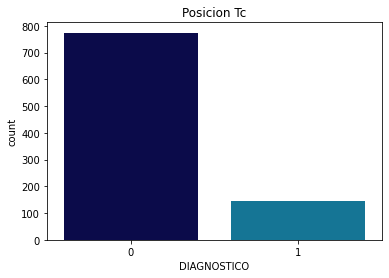

In [ ]:
import seaborn as sns
grafico_Tc=sns.countplot(Data_Tc["DIAGNOSTICO"], palette='ocean')
grafico_Tc.set(title='Posicion Tc')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Ar')]

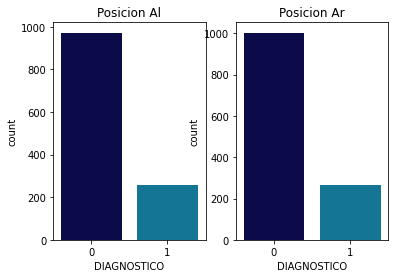

In [ ]:
#Al-Ar
plt.subplot(1, 2, 1)
sns.countplot(Data_Al["DIAGNOSTICO"], palette='ocean').set(title='Posicion Al')
plt.subplot(1, 2, 2)
sns.countplot(Data_Ar["DIAGNOSTICO"], palette='ocean').set(title='Posicion Ar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Pr')]

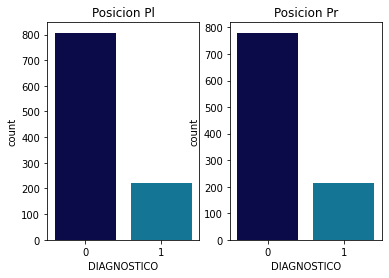

In [ ]:
#Pl-Pr
plt.subplot(1, 2, 1)
sns.countplot(Data_Pl["DIAGNOSTICO"], palette='ocean').set(title='Posicion Pl')
plt.subplot(1, 2, 2)
sns.countplot(Data_Pr["DIAGNOSTICO"], palette='ocean').set(title='Posicion Pr')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posicion Lr')]

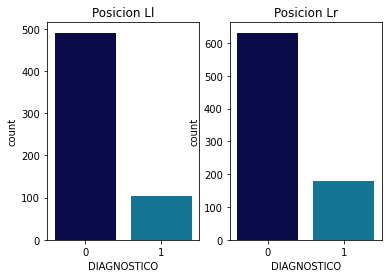

In [ ]:
#Ll-Lr
plt.subplot(1, 2, 1)
sns.countplot(Data_Ll["DIAGNOSTICO"], palette='ocean').set(title='Posicion Ll')
plt.subplot(1, 2, 2)
sns.countplot(Data_Lr["DIAGNOSTICO"], palette='ocean').set(title='Posicion Lr')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Sexo Masculino')]

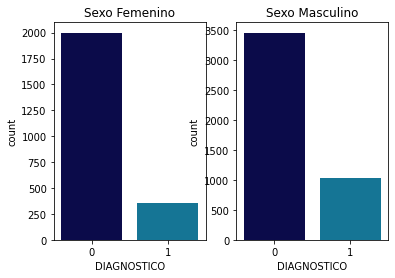

In [ ]:
#Sexo
plt.subplot(1, 2, 1)
sns.countplot(Data_F["DIAGNOSTICO"], palette='ocean').set(title='Sexo Femenino')
plt.subplot(1, 2, 2)
sns.countplot(Data_M["DIAGNOSTICO"], palette='ocean').set(title='Sexo Masculino')

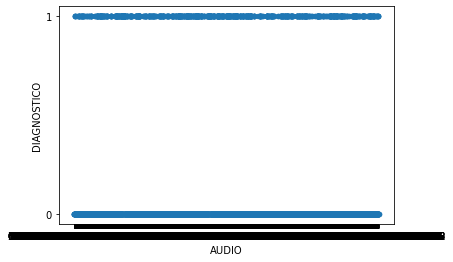

In [ ]:
DFCOPY.plot.scatter(x ="AUDIO", y ="DIAGNOSTICO")